# TorchText

Torchtext是pytorch所推出的套件，進行 NLP 數據處理與讀取的工具

主要的元件為：Dataset、Batch、Example、Field、Iterator

1. Dataset：整個數據集
2. Batch：一組數據
3. Example：一個數據樣本
4. Field：定義如何將文本數據轉成 tensor，主要透過 preprocess() 與 process() (資料處理)
5. Iterator：將 Dataset 按照 batch_size 迭代，產生組組的 batch data

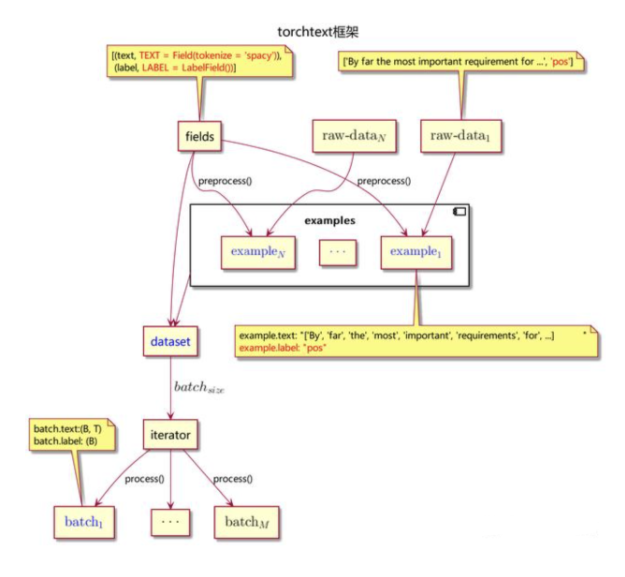

## 載入套件

In [11]:
import torch
import re
from torchtext import datasets
from torchtext.legacy import data
import pandas as pd
import numpy as np


In [7]:
# 探索資料
# 可以發現資料為文本與類別，而類別即為正評與負評
input_data = pd.read_csv('./polarity.tsv', delimiter='\t', header=None, names=['text', 'label'])
input_data

,text,label
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,jaws is a rare film that grabs your attentio...,1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",0
1997,the kids in the hall are an acquired taste .it...,0
1998,there was a time when john carpenter was a gre...,0


## 建立Pipeline生成資料

在 Field 中常見的參數：

1. sequential：定義輸入的資料是否為序列(sequential)文本，若設置為 True，則會將輸入依照給定的 tokenization 函式進行 tokenize，若設置為 False 則不進行 tokenize。

 Ex：
 - True → 輸出資料形式為 ['hi', 'nice', 'to', 'meet', 'you']

 - False → 輸出資料形式為 ‘hi nice to meet you’



2. dtype：設定最後輸出資料的型態
3. lower：是否轉為小寫
4. tokenize：欲使用的 tokenize 函式，這裡使用 ’spacy’ 就是使用 spacy.load(‘en’).tokenizer
5. preprocessing：欲使用的 preprocessing 函式

In [22]:
# 建立Field與Dataset
text_field = data.Field(sequential = True, lower = True,tokenize= 'spacy' )
label_field = data.Field(sequential = False)
input_data = data.TabularDataset(path='./polarity.tsv', format='tsv',fields=[('text',text_field),('label',label_field)])

In [23]:
input_data

In [24]:
# 取的examples並打亂順序
examples = input_data.examples
np.random.shuffle(examples)

# 以8:2的比例切分examples
### <your code> ###
train_ex = examples[:int(len(examples)*0.8)]
test_ex = examples[int(len(examples)*0.8):]


# 建立training與testing dataset
train_data = data.Dataset(examples=train_ex, fields={'text':text_field, 'label':label_field})
test_data = data.Dataset(examples=test_ex, fields={'text':text_field, 'label':label_field})

train_data[0].label, train_data[0].text

('0',
 ['phil',
  '(',
  'radmar',
  'jao',
  ')',
  'has',
  'a',
  'hairy',
  'problem',
  '.his',
  'beard',
  'is',
  'growing',
  'so',
  'rapidly',
  'that',
  'he',
  'has',
  'to',
  'shave',
  'every',
  'hour',
  '.he',
  'recently',
  'met',
  'the',
  'author',
  'of',
  'a',
  'non-fiction',
  'book',
  'on',
  'lycanthropy',
  ',',
  'also',
  'referred',
  'to',
  'in',
  'the',
  'movie',
  'as',
  'werewolfism',
  ',',
  'and',
  'phil',
  'now',
  'believes',
  'that',
  'his',
  'problem',
  'is',
  'that',
  'he',
  'has',
  'become',
  'a',
  'werewolf',
  '.using',
  'enough',
  'chains',
  'and',
  'handcuffs',
  'to',
  'be',
  'a',
  'hit',
  'at',
  'a',
  'sadomasochists',
  'convention',
  ',',
  'he',
  'ties',
  'himself',
  'in',
  'at',
  'night',
  'lest',
  'his',
  'urges',
  'overcome',
  'him',
  '.and',
  'phil',
  'is',
  'just',
  'one',
  'of',
  'the',
  'many',
  'quirky',
  'characters',
  'that',
  'inhabit',
  'shopping',
  'for',
  'fangs'

In [31]:
# 建立字典
text_field.build_vocab(train_data,test_data)
label_field.build_vocab(train_data,test_data)

print(f"Vocabularies of index 0-5: {text_field.vocab.itos[:10]} \n")
print(f"words to index {text_field.vocab.stoi}")

Vocabularies of index 0-5: ['<unk>', '<pad>', ',', 'the', 'a', 'of', 'and', 'to', 'is', 'in'] 

words to index defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7fca97755a90>>, {'<unk>': 0, '<pad>': 1, ',': 2, 'the': 3, 'a': 4, 'of': 5, 'and': 6, 'to': 7, 'is': 8, 'in': 9, '"': 10, 'that': 11, '(': 12, ')': 13, 'it': 14, 'as': 15, 'with': 16, 'for': 17, '.': 18, 'his': 19, 'film': 20, 'this': 21, '.the': 22, 'on': 23, 'are': 24, 'but': 25, 'he': 26, 'be': 27, 'by': 28, 'an': 29, 'i': 30, 'movie': 31, 'who': 32, 'not': 33, 'one': 34, 'was': 35, 'have': 36, 'from': 37, 'has': 38, 'at': 39, 'her': 40, 'you': 41, 'all': 42, 'they': 43, 'about': 44, 'out': 45, 'like': 46, 'more': 47, 'so': 48, 'which': 49, 'up': 50, ':': 51, 'their': 52, 'or': 53, 'some': 54, 'just': 55, 'him': 56, 'what': 57, 'into': 58, 'when': 59, 'than': 60, "it's": 61, 'only': 62, 'good': 63, 'time': 64, 'its': 65, 'can': 66, 'she': 67, 'even': 68, 'no': 69, 'most': 70, 'wi

In [33]:

# create iterator for training and testing data
train_iter, test_iter = data.Iterator.splits(datasets=(train_data, test_data),
                        batch_sizes = (3, 3), # train_data 抽三筆，有三個欄位。
                        repeat=False,  
                        sort_key = lambda ex:len(ex.text)) 

In [35]:
for train_batch in train_iter:
    print(train_batch.text, train_batch.text.shape)
    print(train_batch.label, train_batch.label.shape)
    break

tensor([2, 2, 2]) torch.Size([3])
